In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
from keras.datasets import mnist

In [124]:
#Load dataset for the model
(X_train, y_train), (X_test, y_test) = mnist.load_data()

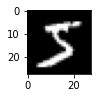

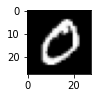

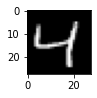

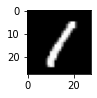

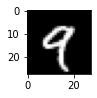

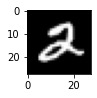

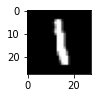

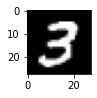

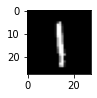

In [125]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [127]:
#Create categorical labels for the model

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [128]:
#Reshape images from 2d array to 1d array

X_train = np.reshape(X_train,(len(X_train), 28*28))
X_test = np.reshape(X_test,(len(X_test), 28*28))

In [129]:
#Scale each pixel to scope between 0 - 1.
X_train = np.asarray(list(map(lambda img: img / 255 ,X_train)))
X_test = np.asarray(list(map(lambda img: img / 255 ,X_test)))

In [130]:
# Defining a model
model = Sequential()

model.add(Dense(units=784,activation='relu'))
model.add(Dense(units=784,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)

model.compile(loss='categorical_crossentropy', optimizer=opt)

In [131]:
#Define a condition to stop training
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [132]:
model.fit(x=X_train,
         y=y_train_cat,
         epochs=200,
         batch_size=128,
         validation_data=(X_test, y_test_cat),
         verbose=1,
         callbacks=[early_stop])

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 0.3948 - val_loss: 0.1785

<AxesSubplot:>

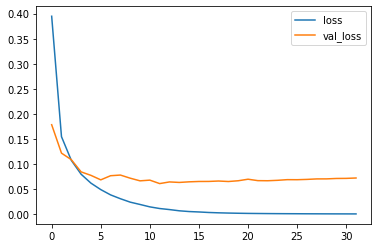

In [133]:
#Plot training process

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [134]:
predict_x=model.predict(X_test) 
predictions=np.argmax(predict_x,axis=1)

In [135]:
#Evaluating the model

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 969    0    0    1    2    0    2    1    4    1]
 [   0 1127    2    1    0    1    2    1    1    0]
 [   2    0 1011    1    3    0    3    9    3    0]
 [   1    0    3  993    0    3    0    3    4    3]
 [   0    0    2    1  966   

In [136]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "./")